In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Structuring data frame
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [7]:
dfe = df.explode("job_skills").copy()
dfe = dfe.groupby(["job_title_short", "job_skills"]).size()
dfe = dfe.reset_index(name = "skill_count").sort_values(by= "skill_count", ascending = False)
dfe

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


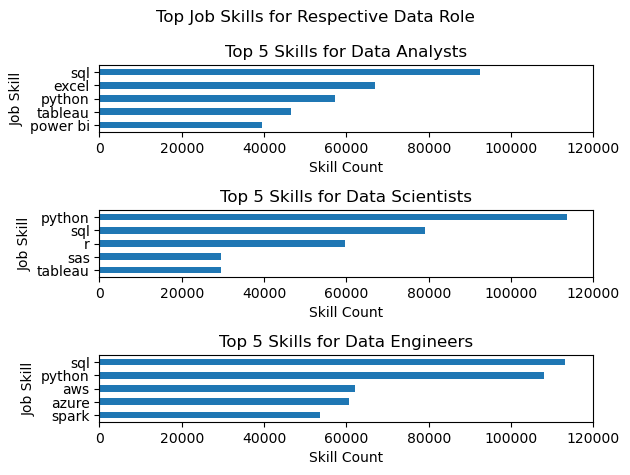

In [20]:
fig, ax = plt.subplots(3, 1)
job_titles = ["Data Analyst", "Data Scientist", "Data Engineer"]
job_number = 5
for i, job in enumerate(job_titles):
    skills_count = dfe[dfe["job_title_short"] == job].head(job_number)
    skills_count.plot(kind="barh", x = "job_skills", y = "skill_count", ax=ax[i], title=(f"Top {job_number} Skills for {job}s"))
    ax[i].set_ylabel("Job Skill")
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120_000)
    ax[i].set_xlabel("Skill Count")

fig.suptitle("Top Job Skills for Respective Data Role")
fig.tight_layout()